## Steps to perform PCA Manually by Python Code

#### 1 ) Prepare The Data

In [1]:
import numpy as np
# Creating an Array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape # m-observations, n-features

print("Array:")
print(A) # our array

print("---")
print("Dimensions:")
print(A.shape) # shape

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [2]:
# Converting the array into a DataFrame ...
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


#### 2 ) Find the Co-variance

If the covariance is high, it means that the variables are highly correlated and change in one results in a change in the other one too. Generally, we avoid using highly correlated variables in building a machine learning model.

In [4]:
a0 = A[:,0]
a1 = A[:,1]

Way - I

In [5]:
product = a0*a1 # element-wise product
print("Length of prod equals " + str(len(product)))
print("---")
print("Covariance:")
print(np.sum(product)/(m-1))

Length of prod equals 6
---
Covariance:
25.0


Way - II

In [6]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

Way - III

In [7]:
Sigma = (A.T @ A)/(m-1) # or np.cov(A.T)
Sigma

array([[20., 25.],
       [25., 40.]])

#### 3 ) Eigenvalue , EigenVectors

$$
{\displaystyle T(\mathbf v )=\lambda \mathbf ({v}) ,} 
$$

In [9]:
l, X = np.linalg.eig(Sigma)
print("Eigenvalues:\n")
print(l)
print("\n--------------------------\n")
print("Eigenvectors:\n")
print(X)

Eigenvalues:

[ 3.07417596 56.92582404]

--------------------------

Eigenvectors:

[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [10]:
X[:,0]

array([-0.82806723,  0.56062881])

In [11]:
X[:,1]

array([-0.56062881, -0.82806723])

                        Check this formula :
$$
{\displaystyle T(\mathbf {v} )=\lambda \mathbf {v} ,} 
$$

In [12]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma times eigenvector:")
print(Sigma @ X[:,0]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) # scalar times 2x1

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [13]:
# ... and the product with the second eigenvalue
print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [43]:
print("Eigenvalues:\n")
print(l)
print("\n--------------------------\n")
print("Eigenvectors:\n")
print(X)

Eigenvalues:

[ 3.07417596 56.92582404]

--------------------------

Eigenvectors:

[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [51]:
print("The first principal component is eigenvector with largest evalue:",l[1])
print(X[:,1])
print("---")
print("Second principal component:",l[0])
print(X[:,0])

The first principal component is eigenvector with largest evalue: 56.92582403567252
[-0.56062881 -0.82806723]
---
Second principal component: 3.0741759643274804
[-0.82806723  0.56062881]


****Are Principal Components Orthogonal ( Perpendicular to each other ) ? ****

In [52]:
#If the dot product of two matrices is zero, then they are considered to be orthogonal
X[:,1].T @ X[:,0]

0.0

#### 4 ) Dimensionality Reduction 2D -> 1D

In [14]:
# change to matrix
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)

In [15]:
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [16]:
Xmat

matrix([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]])

In [56]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1 = Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [57]:
Acomp = Amat @ pc1 # the dot product of a 6x2 and 2x1 matrix yields a 6x1 matrix
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [58]:
# Choose eigenvector with 2nd eigenvalue as second principal component
pc2 = Xmat[:,0]
pc2

matrix([[-0.82806723],
        [ 0.56062881]])

In [59]:
Acomp_2 = Amat @ pc2 # the dot product of a 6x2 and 2x1 matrix yields a 6x1 matrix
print("Compressed version of A:")
print(Acomp_2)

Compressed version of A:
[[ 1.44019997]
 [-0.05150393]
 [-1.31144014]
 [-1.38869604]
 [ 2.75164011]
 [-1.44019997]]


### Summary of Eigen-decomposition Approach

##### 2D -> 1D

1. Normalize columns of $A$ so that each feature has a mean of zero
1. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
1. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
1. Compress by ordering $k$ evectors according to largest e-values and compute $AX_k$

##### Reverse

1. Reconstruct from the compressed version by computing $A X_k X_k^T$

## Python Implementation

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# we are using the free glass datset.
# The objective is to tell the type of glass based on amount of other elements present.
data = pd.read_csv('glass.data')

In [19]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [21]:
data=data.drop(labels=['index','Class'], axis=1)

In [22]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


We’ll go ahead and standardise this data as all the data is on a different scale.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [24]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [25]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [26]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


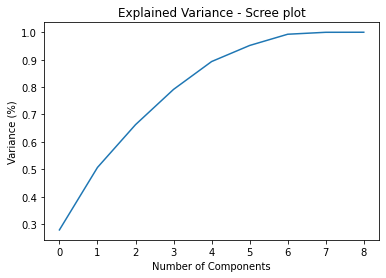

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance - Scree plot')
plt.show()

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [70]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [71]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 4. This is the advantage of PCA. _It drastically reduces the number of features, thereby considerably reducing the training time for the model._

**Pros of PCA:**

- Correlated features are removed.
- Model training time is reduced.
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

**Cons of PCA**
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.

### Conclusion
From all the explanations above, we can conclude that PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.